In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import wordcloud
import re
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [12]:
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.sentiment.util import *
from wordcloud import WordCloud,STOPWORDS

In [5]:
df = pd.read_csv('/content/road_accidents_india.csv', lineterminator='\n')
df.head()

,Unnamed: 0,title,desc,date,datetime,link,img,media,site,news_body,keywords,summary
0,0,"With single data source, India tends to underr...",bookmark_border,15 hours ago,2021-10-18 02:42:02.136232,news.google.com/./articles/CAIiEOo3NN6fnN_XumM...,https://lh3.googleusercontent.com/proxy/BnYtZe...,NaN,Business Standard,India banks solely on police data for estimati...,"['traffic', 'report', 'accidents', 'tends', 's...","Why police data are incompleteIn India, there ..."
1,1,Road accidents can be reduced,Opinion,12 days ago,2021-10-06 17:42:02.137142,news.google.com/./articles/CBMiWGh0dHBzOi8vd3d...,https://lh3.googleusercontent.com/proxy/NcwEto...,NaN,The Hindu,"Public discourse, improving infrastructure can...","['number', 'reduced', 'india', 'highways', 'de...",According to a study conducted by the Ministry...
2,2,India loses 1.5 lakh lives due to road acciden...,bookmark_border,7 days ago,2021-10-11 17:42:02.138012,news.google.com/./articles/CAIiELr8Keq_4Ea4CJ0...,https://lh3.googleusercontent.com/proxy/WzHP04...,NaN,Firstpost,While India accounts for about 1% of motor veh...,"['lives', 'traffic', 'vehicles', 'saved', '15'...",Adopting the safe system approachTraditionally...
3,3,"Centres newest way to address road fatalities,...",bookmark_border,12 days ago,2021-10-06 17:42:02.138906,news.google.com/./articles/CAIiEHNglsNIG0WS4c9...,https://lh3.googleusercontent.com/proxy/JYXK_P...,NaN,Firstpost,From signing the Brasilia Declaration to the M...,"['rewards', 'act', 'way', 'vehicles', 'centres...","Gadkari said that a total of 366,138 road acci..."
4,4,1.2 Lakh Lives Were Lost On The Roads In India...,bookmark_border,20 Sep,NaN,news.google.com/./articles/CAIiECsCPIwcgjomvK_...,https://lh3.googleusercontent.com/proxy/XHZFEy...,NaN,Indiatimes.com,Road accidents have remained one of the bigges...,"['lives', 'country', 'cases', 'report', 'day',...",Road accidents have remained one of the bigges...


In [7]:
import re,string,unicodedata
stopwd = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stopwd.update(punctuation)

In [8]:
#use beautifulsoup library to extract text from html data
def clean_html(text):
    soup=BeautifulSoup(text, "html.parser")
    return soup.get_text()

#remove [], */ etc html tags from text using "re" lib

def remove_betwn_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#remove urls from data

def remove_betwn_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#lets remove stopwords we counted before
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwd:
            final_text.append(i.strip())
    return " ".join(final_text)

#finally we remove all noisy data
def remove_noisy_text(text):
    text = clean_html(text)
    text = remove_betwn_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [10]:
from bs4 import BeautifulSoup
df['title']=df['title'].apply(remove_noisy_text)
df['title']

0     single data source, India tends underreport ro...
1                                Road accidents reduced
2     India loses 1.5 lakh lives due road accidents ...
3     Centres newest way address road fatalities, ca...
4     1.2 Lakh Lives Lost Roads India 2020, 328 Deat...
                            ...                        
91        Gadkari: Hope road accidents reduced 50% 2025
92    India recorded highest number road accident de...
93    Odisha records 11% fall road accident deaths 2020
94    Poor enforcement, training: reasons many road ...
95    Punjab lost Rs 15000 crore — 3% GDP — due road...
Name: title, Length: 96, dtype: object

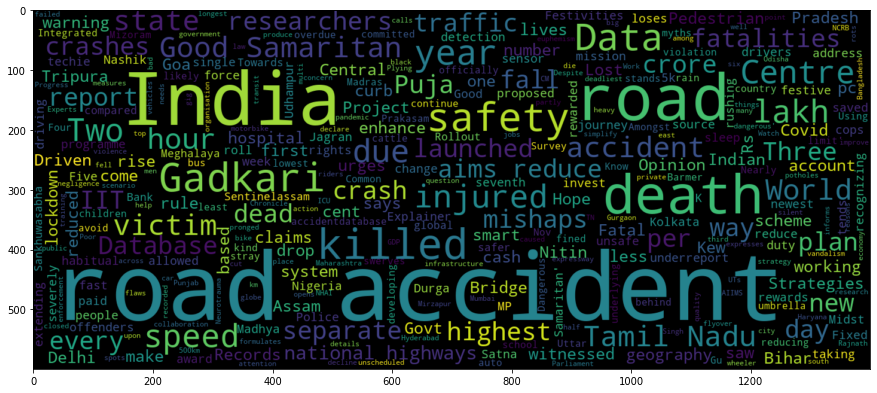

In [17]:
plt.figure(figsize = (15,15)) # non-sarcastic words wordcloud
wordcld = WordCloud(max_words = 3000 , width = 1400 , height = 600).generate((" ".join(df.title)))
plt.imshow(wordcld , interpolation = 'bilinear')

In [18]:
from bs4 import BeautifulSoup
df['news_body']=df['news_body'].apply(remove_noisy_text)
df['news_body']

0     India banks solely police data estimating deat...
1     Public discourse, improving infrastructure hel...
2     India accounts 1% motor vehicles globally, rec...
3     signing Brasilia Declaration Motor Vehicles Am...
4     Road accidents remained one biggest causes unn...
                            ...                        
91    Nitin Gadkari, Union minister road transport h...
92    India recorded highest number road accident de...
93    BHUBANESWAR: Fatality rate road accidents Odis...
94    Road accidents cost India 3-5% gross domestic ...
95    Around 3.3 3.5 per cent deaths due road accide...
Name: news_body, Length: 96, dtype: object

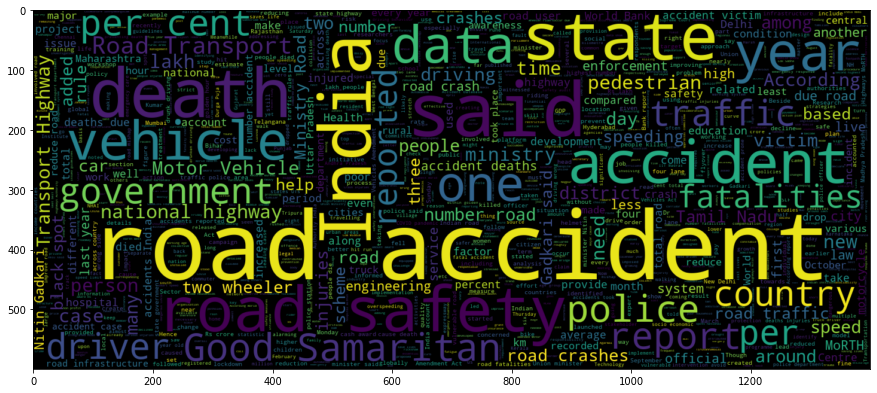

In [19]:
plt.figure(figsize = (15,15)) # non-sarcastic words wordcloud
wordcld = WordCloud(max_words = 3000 , width = 1400 , height = 600).generate((" ".join(df.news_body)))
plt.imshow(wordcld , interpolation = 'bilinear')

In [20]:
from bs4 import BeautifulSoup
df['summary']=df['summary'].apply(remove_noisy_text)
df['summary']

0     police data incompleteIn India, two reports da...
1     According study conducted Ministry Road Transp...
2     Adopting safe system approachTraditionally, ro...
3     Gadkari said total 366,138 road accidents occu...
4     Road accidents remained one biggest causes unn...
                            ...                        
91    Nitin Gadkari, Union minister road transport h...
92    India recorded highest number road accident de...
93    BHUBANESWAR: Fatality rate road accidents Odis...
94    India’s young, productive population, aged 18-...
95    total monetary loss Punjab terms road accident...
Name: summary, Length: 96, dtype: object

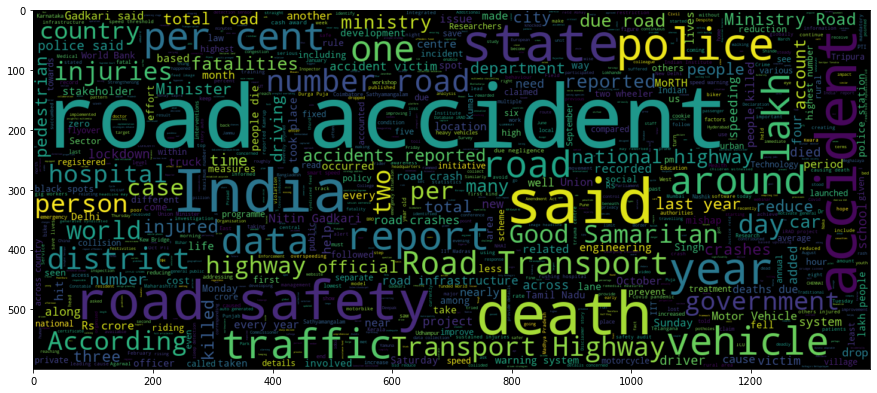

In [21]:
plt.figure(figsize = (15,15)) # non-sarcastic words wordcloud
wordcld = WordCloud(max_words = 3000 , width = 1400 , height = 600).generate((" ".join(df.summary)))
plt.imshow(wordcld , interpolation = 'bilinear')